<a href="https://colab.research.google.com/github/mahdimazari/restaurant-menu/blob/master/immobiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#data = pd.read_csv('https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20200416-115822/valeursfoncieres-2019.txt')
data_2015 = pd.read_csv('https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20200416-114842/valeursfoncieres-2015.txt', sep=('|') )
data_2015.to_csv('data.csv', sep='|', index=True)
data_15.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,23,24,26,28,30,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NameError: ignored

In [ ]:
import pandas as pd 

dvf = pd.read_csv('https://raw.githubusercontent.com/anisayari/Youtube-apprendre-python-intelligence-artificielle/master/%2310%20-%202eme%20Projet%20-%20Ventes%20immobili%C3%A8res/df_marseille_dvf.csv', sep='|')
dvf.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


No disposition Date mutation  ... Nombre pieces principales  year
151120               2    06/02/2015  ...                       NaN  2015
151121               1    22/10/2015  ...                       3.0  2015
151122               1    03/09/2015  ...                       4.0  2015
151123               1    22/10/2015  ...                       4.0  2015
151124               1    05/11/2015  ...                       0.0  2015

[5 rows x 22 columns]

In [ ]:
dvf.shape

(151125, 22)

In [ ]:
dvf.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', '1er lot', 'Nombre de lots', 'Code type local',
       'Type local', 'Surface reelle bati', 'Nombre pieces principales',
       'year'],
      dtype='object')

In [ ]:
import numpy as np
print(np.log(1000000000))
np.log(1000000)

20.72326583694641


13.815510557964274

In [ ]:
def preprocessing(df):
  
   df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')
   df['annee'] = df['Date mutation'].dt.year
   df['mois'] = df['Date mutation'].dt.month
   df['jour'] = df['Date mutation'].dt.day
   df = df.drop_duplicates()
   df = df[df['Type local'].isin(['Maison', 'Appartement'])]
   df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
   df['Valeur fonciere'] = df['Valeur fonciere'].astype('float')
   df = df[df['Valeur fonciere'] < 10000000]
   df = df[df['Nombre pieces principales'] < 21]
   df['Valeur au m2'] = df['Valeur fonciere']/df['Surface reelle bati']
   
   return df

df = dvf.copy()
df = preprocessing(df)  
df.shape

(73322, 26)

In [ ]:
df.head()

No disposition Date mutation Nature mutation  ...  mois  jour Valeur au m2
2                1    2019-01-04           Vente  ...     1     4  2461.538462
3                1    2019-01-04           Vente  ...     1     4  1600.000000
5                1    2019-01-03           Vente  ...     1     3  2734.375000
9                1    2019-01-11           Vente  ...     1    11  4989.473684
10               1    2019-01-09           Vente  ...     1     9  1785.714286

[5 rows x 26 columns]

In [ ]:
df.isnull().sum()

No disposition                   0
Date mutation                    0
Nature mutation                  0
Valeur fonciere                  0
No voie                       1965
Type de voie                  1134
Code voie                        0
Voie                             0
Code postal                      2
Commune                          0
Code departement                 0
Code commune                     0
Prefixe de section               0
Section                          0
No plan                          0
1er lot                      11731
Nombre de lots                   0
Code type local                  0
Type local                       0
Surface reelle bati              0
Nombre pieces principales        0
year                             0
annee                            0
mois                             0
jour                             0
Valeur au m2                     0
dtype: int64

In [ ]:
df['No voie'].value_counts(dropna= False)

NaN       1965
2.0       1838
1.0       1802
4.0       1751
3.0       1624
          ... 
5251.0       1
5250.0       1
600.0        1
9110.0       1
417.0        1
Name: No voie, Length: 736, dtype: int64

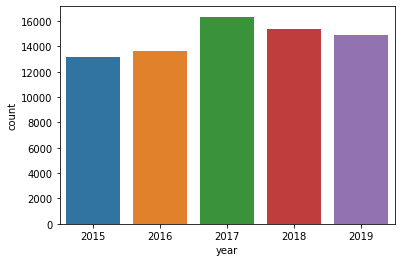

In [ ]:
import seaborn as sns

sns.countplot(x='year', data=df)

In [ ]:
df.describe()

No disposition  Valeur fonciere  ...          jour  Valeur au m2
count    73322.000000     7.332200e+04  ...  73322.000000  7.332200e+04
mean         1.015439     2.889034e+05  ...     16.932380  5.592140e+03
std          0.205704     6.403795e+05  ...      8.992427  3.448085e+04
min          1.000000     0.000000e+00  ...      1.000000  0.000000e+00
25%          1.000000     9.900000e+04  ...      9.000000  1.944444e+03
50%          1.000000     1.591000e+05  ...     18.000000  2.769231e+03
75%          1.000000     2.592375e+05  ...     25.000000  3.909532e+03
max         16.000000     8.500000e+06  ...     31.000000  5.320000e+06

[8 rows x 17 columns]

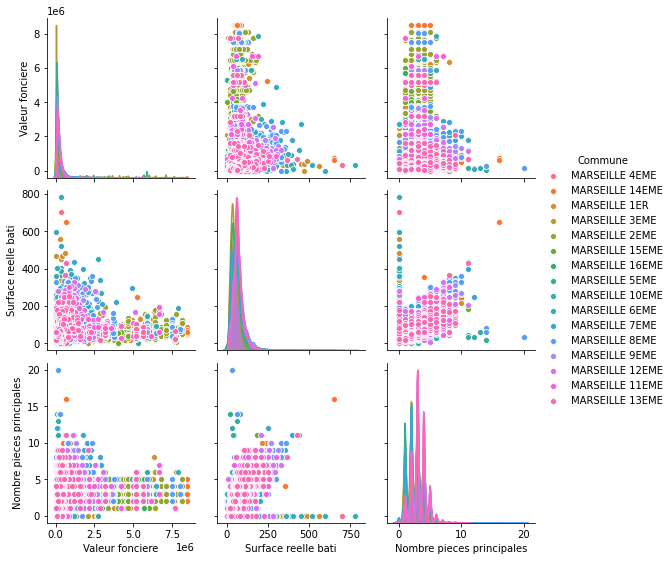

In [ ]:
import plotly.express as px 

sns.pairplot(df[['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales', 'Commune']], hue='Commune')

In [ ]:
fig = px.box(df, x='year', y='Valeur au m2', hover_data= ['Commune', 'Voie'])
fig.show()

In [ ]:
fig = px.line(df[df['Voie'] == 'TROIS FRERES CARASSO'].sort_values('Date mutation'), x='Date mutation', y='Valeur fonciere', title='evolution de prix')
fig.show()

In [ ]:
fig = px.line(df[df['Voie'] == 'TROIS FRERES CARASSO'].sort_values('Date mutation'), x='Date mutation', y='Valeur au m2', title='Evaluation de prix')
fig.show()
